In [6]:
#梯度下降 通用优化算法
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#构建原函数
f = lambda x: (x - 3.5)**2 - 4.5*x + 10
#导函数
g = lambda x: 2 * (x- 3.5) - 4.5

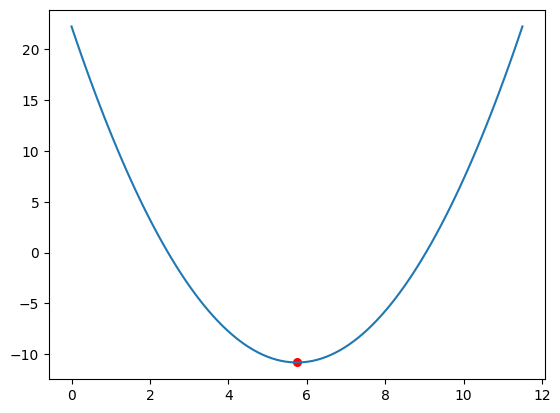

In [9]:
x = np.linspace(0,11.5,100)
y = f(x)
plt.plot(x,y)
plt.scatter(5.75,f(5.75),color='red',s = 30) 

随机x是： 3
更新之后的x: 3.55
更新之后的x: 3.9899999999999998
更新之后的x: 4.342
更新之后的x: 4.6236
更新之后的x: 4.848879999999999
更新之后的x: 5.029103999999999
更新之后的x: 5.173283199999999
更新之后的x: 5.288626559999999
更新之后的x: 5.380901247999999
更新之后的x: 5.454720998399999
更新之后的x: 5.5137767987199995
更新之后的x: 5.561021438976
更新之后的x: 5.5988171511808
更新之后的x: 5.62905372094464
更新之后的x: 5.6532429767557115
更新之后的x: 5.672594381404569
更新之后的x: 5.688075505123655
更新之后的x: 5.700460404098925
更新之后的x: 5.710368323279139
更新之后的x: 5.718294658623312
更新之后的x: 5.724635726898649
更新之后的x: 5.729708581518919
更新之后的x: 5.733766865215135
更新之后的x: 5.7370134921721085
更新之后的x: 5.739610793737687
更新之后的x: 5.741688634990149
更新之后的x: 5.743350907992119
更新之后的x: 5.744680726393695
更新之后的x: 5.745744581114956
更新之后的x: 5.746595664891965
更新之后的x: 5.747276531913572
更新之后的x: 5.747821225530858
更新之后的x: 5.748256980424687
更新之后的x: 5.748605584339749
更新之后的x: 5.748884467471799
更新之后的x: 5.749107573977439
更新之后的x: 5.7492860591819515
更新之后的x: 5.749428847345561
更新之后的x: 5.7495430778764485
更新之后的x: 5.7496

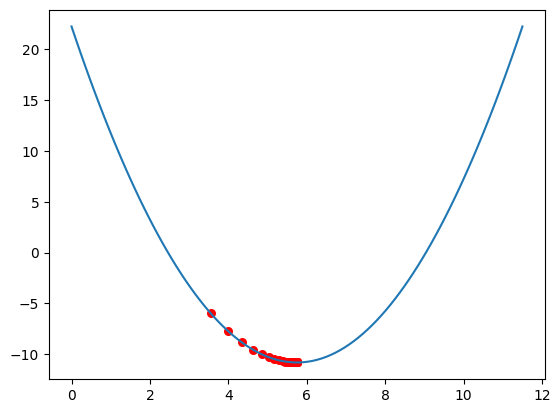

In [18]:
#求方程最小值  不能令方程的导函数为0去求解
#使用梯度下降
eta = 0.1 #学习率

x = np.random.randint(0,12,size=1)[0]
last_x = x + 0.1

#精确度
percision = 0.0001
x_ = []
print('随机x是：',x)
count = 0
while True:
    if np.abs(x - last_x) < percision:
        break
    last_x = x
    x -= eta * g(x)
    count += 1
    x_.append(x)
    print('更新之后的x:',x)
print('梯度下降次数:',count)

x1 = np.linspace(0,11.5,100)
y1 = f(x1)
plt.plot(x1,y1)
x_ = np.array(x_) #转化成np数组
plt.scatter(x_,f(x_),color='red',s = 30) 


### BDG 批量梯度下降

#### 一元一次线性回归

np.int32(9)

np.int32(7)

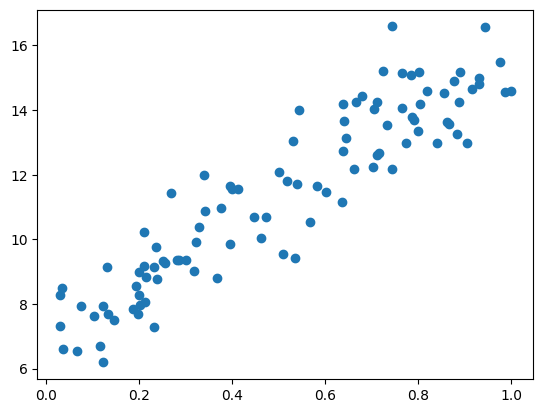

In [43]:
x = np.random.rand(100,1)
w,b = np.random.randint(1,10,size=2)
display(w,b)
y = w * x + b + np.random.randn(100,1) #增加数据噪声，“加盐”

plt.scatter(x,y)

In [44]:
#将b作为偏置项
#display(x.shape,x)
x = np.concatenate([x,np.full(shape=(100,1),fill_value=1)],axis=1)

In [45]:
x[:10]

array([[0.78475581, 1.        ],
       [0.25699311, 1.        ],
       [0.80331643, 1.        ],
       [0.31944118, 1.        ],
       [0.71180022, 1.        ],
       [0.58304943, 1.        ],
       [0.88326344, 1.        ],
       [0.13199235, 1.        ],
       [0.72457087, 1.        ],
       [0.21417981, 1.        ]])

##### $ \theta_{t+1} = \theta_t - \eta \cdot X^T(X\theta - y) $

In [46]:
#循环次数
epoches = 10000

#学习率
eta = 0.001

#要求解的系数，随机数，赋值，瞎蒙
theta = np.random.rand(2,1)

for i in range(epoches):
    g = x.T.dot(x.dot(theta) - y) #根据公式计算的梯度
    theta -= eta * g
print('真实的斜率、截距是:',w,b)
print('BGD求解的斜率、截距是:',theta[0],theta[1])

真实的斜率、截距是: 9 7
BGD求解的斜率、截距是: [8.75011076] [6.98050288]


In [47]:
#逆时衰减学习率
t0 = 5
t1 = 1000
def learning_rate_shedule(t):
    return t0 / (t + t1)

#梯度下降次数
t = 0

for i in range(epoches):
    g = x.T.dot(x.dot(theta) - y) #根据公式计算的梯度
    eta = learning_rate_shedule(t) #随着梯度下降次数增加，学习路下降
    theta -= eta * g
print('真实的斜率、截距是:',w,b)
print('BGD求解的斜率、截距是:',theta[0],theta[1])


真实的斜率、截距是: 9 7
BGD求解的斜率、截距是: [8.75011076] [6.98050288]


#### 多元一次

x = np.random.rand(100,8)
w = np.random.randint(1,10,size=(8,1))
b = np.random.randint(1,10,size=1)
display(x.shape,w.shape,b.shape)

In [57]:
#增加数据噪声，“加盐” 
#random.randn具有广播机制
y = x.dot(w) + b + np.random.randn(100,1) 

x = np.concatenate([x,np.full(shape=(100,1),fill_value=1)],axis = 1)

In [60]:
#要求解的系数，随机数，赋值，瞎蒙
theta = np.random.rand(9,1)

#逆时衰减学习率
t0 = 5
t1 = 1000
def learning_rate_shedule(t):
    return t0 / (t + t1)

#梯度下降次数
t = 0

for i in range(epoches):
    g = x.T.dot(x.dot(theta) - y) #根据公式计算的梯度
    eta = learning_rate_shedule(t) #随着梯度下降次数增加，学习路下降
    theta -= eta * g
print('真实的斜率、截距是:',w,b)
print('BGD求解的斜率、截距是:',theta)

真实的斜率、截距是: [[7]
 [3]
 [2]
 [3]
 [1]
 [3]
 [2]
 [4]] [2]
BGD求解的斜率、截距是: [[6.17472404]
 [3.03504123]
 [1.26396914]
 [2.71638639]
 [0.79174931]
 [3.11479375]
 [2.39125438]
 [3.86039479]
 [2.78338919]]


### SGD随即梯度下降

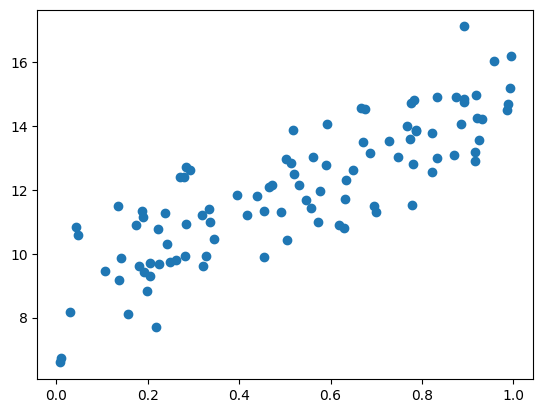

In [86]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100,1)
w,b = np.random.randint(1,10,size=2)

y = w * x + b + np.random.randn(100,1) #增加数据噪声，“加盐”

plt.scatter(x,y)

In [87]:
#循环次数
epoches = 100

#逆时衰减学习率
t0 = 5
t1 = 1000
def learning_rate_shedule(t):
    return t0 / (t + t1)

#要求解的系数，随机数，赋值，瞎蒙
theta = np.random.rand(2,1)

##### $ \theta_{t+1} = \theta_t - \eta \cdot X^T(X\theta - y) $

In [88]:
#将b作为偏置项
x = np.concatenate([x,np.full(shape=(100,1),fill_value=1)],axis=1)

In [91]:

display(x[1].shape) #取出数据是一维的
display(x[[1]].shape) #取出数据是二维的
display(theta.shape)

(2,)

(1, 2)

(2, 1)

In [90]:
count = 0
for t in range(epoches):
    index = np.arange(100)
    np.random.shuffle(index) #洗牌，打乱顺序
    x = x[index]
    y = y[index]
    for i in range(100):
        #随机抽样，抽取了一个样本
        x_i = x[[i]]
        y_i = y[[i]]

        #根据一个样本，进行梯度计算
        g = x_i.T.dot(x_i.dot(theta) -y_i)
        eta = learning_rate_shedule(count)
        count += 1
        theta -= eta * g
print('真实的斜率、截距是:',w,b)
print('SGD求解的斜率、截距是:',theta)

真实的斜率、截距是: 6 9
SGD求解的斜率、截距是: [[5.74815089]
 [9.03607405]]


#### 多元一次方程

In [92]:
x = np.random.rand(100,8)
w = np.random.randint(1,10,size=(8,1))
b = np.random.randint(1,10,size=1)
display(x.shape,w.shape,b.shape)

(100, 8)

(8, 1)

(1,)

In [93]:
#增加数据噪声，“加盐” 
#random.randn具有广播机制
y = x.dot(w) + b + np.random.randn(100,1) 

x = np.concatenate([x,np.full(shape=(100,1),fill_value=1)],axis = 1)

In [96]:
#循环次数
epoches = 10000

#要求解的系数，随机数，赋值，瞎蒙
theta = np.random.rand(9,1)

#逆时衰减学习率
t0 = 5
t1 = 1000
def learning_rate_shedule(t):
    return t0 / (t + t1)

#梯度下降次数
count = 0
for t in range(epoches):
    index = np.arange(100)
    np.random.shuffle(index) #洗牌，打乱顺序
    x = x[index]
    y = y[index]
    for i in range(100):
        #随机抽样，抽取了一个样本
        x_i = x[[i]]
        y_i = y[[i]]

        #根据一个样本，进行梯度计算
        g = x_i.T.dot(x_i.dot(theta) -y_i)
        eta = learning_rate_shedule(count)
        count += 1
        theta -= eta * g
print('真实的斜率、截距是:',w,b)
print('SGD求解的斜率、截距是:',theta)

真实的斜率、截距是: [[4]
 [1]
 [6]
 [8]
 [2]
 [2]
 [6]
 [1]] [1]
SGD求解的斜率、截距是: [[2.8128764 ]
 [0.56897705]
 [5.6193292 ]
 [6.72832772]
 [2.04729578]
 [1.67231285]
 [5.45519645]
 [0.93660898]
 [3.21209591]]


### MBGD小批量梯度下降

In [100]:
import numpy as np

# 生成线性数据 (100个样本)
X = np.random.rand(100, 1)
w_true, b_true = np.random.randint(1, 10, size=2)
y = w_true * X + b_true + np.random.randn(100, 1)  # 添加高斯噪声

# 添加偏置项 (x0=1)
X = np.c_[X, np.ones((100, 1))]

t0, t1 = 5, 500  # 学习率调度参数
def learning_rate_schedule(t):
    """随时间递减的学习率"""
    return t0 / (t + t1)

epochs = 100        # 训练轮次
n_samples = 100     # 样本总数
batch_size = 16     # 小批量大小
num_batches = n_samples // batch_size  # 每轮批次数

theta = np.random.randn(2, 1)  # 标准正态分布初始化

for epoch in range(epochs):
    # 打乱数据顺序
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    
    # 小批量迭代
    for i in range(num_batches):
        # 获取当前批次数据
        X_batch = X[i*batch_size : (i+1)*batch_size]
        y_batch = y[i*batch_size : (i+1)*batch_size]
        
        # 计算梯度
        gradient = X_batch.T.dot(X_batch.dot(theta) - y_batch)
        
        # 更新学习率
        lr = learning_rate_schedule(epoch * num_batches + i)
        
        # 参数更新
        theta -= lr * gradient

print(f"真实参数 - 斜率: {w_true}, 截距: {b_true}")
print(f"MBGD求解 - 斜率: {theta[0][0]:.2f}, 截距: {theta[1][0]:.2f}")

真实参数 - 斜率: 4, 截距: 9
MBGD求解 - 斜率: 3.60, 截距: 9.13


### 多元一次方程

In [108]:
import numpy as np

# 生成线性数据 (100个样本)
X = np.random.rand(100, 3)
w_true = np.random.randint(1, 10, size=(3,1))
b_true = np.random.randint(1,10,size = 1)
y = X.dot(w_true) + b_true + np.random.randn(100, 1)  # 添加高斯噪声

# 添加偏置项 (x0=1)
X = np.c_[X, np.ones((100, 1))]

t0, t1 = 5, 500  # 学习率调度参数
def learning_rate_schedule(t):
    """随时间递减的学习率"""
    return t0 / (t + t1)

epochs = 100        # 训练轮次
n_samples = 100     # 样本总数
batch_size = 16     # 小批量大小
num_batches = n_samples // batch_size  # 每轮批次数

theta = np.random.randn(4, 1)  # 标准正态分布初始化

for epoch in range(epochs):
    # 打乱数据顺序
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    
    # 小批量迭代
    for i in range(num_batches):
        # 获取当前批次数据
        X_batch = X[i*batch_size : (i+1)*batch_size]
        y_batch = y[i*batch_size : (i+1)*batch_size]
        
        # 计算梯度
        gradient = X_batch.T.dot(X_batch.dot(theta) - y_batch)
        
        # 更新学习率
        lr = learning_rate_schedule(epoch * num_batches + i)
        
        # 参数更新
        theta -= lr * gradient

print('真实的斜率、截距是:',w,b)
print('SGD求解的斜率、截距是:',theta)

真实的斜率、截距是: [[4]
 [1]
 [6]
 [8]
 [2]
 [2]
 [6]
 [1]] [1]
SGD求解的斜率、截距是: [[5.93429196]
 [6.68114389]
 [5.53268478]
 [8.79171529]]
